# Introduction to financial technical analysis
 by José Ricardo Munguía Marín A....


## 📌 Objectives



By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


##1 Import and install librairies

In [ ]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

##2 Get the list of stocks in the S&P 500

In [ ]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
ticker_list = df_tickers['Symbol'].tolist()

##3 Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [ ]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [ ]:
df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
display(df_close.head())
# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)

/tmp/ipython-input-7-3141877576.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376297,168.283691,154.714767,156.160004,103.735443,91.096085,293.442108,469.390015,189.859940,55.668903,...,29.172791,91.453209,51.484386,111.217087,129.094391,66.839996,132.078354,118.202545,309.049988,156.223282
2024-05-02,136.217361,171.991287,153.844208,158.330002,103.374352,90.497009,295.092773,476.570007,192.405914,56.603558,...,29.955240,93.958237,51.493965,111.418365,134.052750,70.300003,131.824631,117.115036,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695099,159.710007,103.354820,89.774330,298.403870,486.179993,195.480637,56.431885,...,30.032518,95.378403,51.934326,111.188332,135.255356,69.470001,131.112152,120.278709,309.589996,164.670197
2024-05-06,139.278076,180.619186,155.681030,162.000000,103.101067,92.370285,300.712860,493.589996,199.093948,57.404686,...,30.022860,96.522438,52.039635,111.907227,137.217010,73.529999,132.907913,119.191200,315.790009,163.566269
2024-05-07,139.931854,181.305038,155.508835,159.809998,103.618324,93.387741,305.232483,492.269989,199.338745,58.739902,...,29.800682,95.891251,52.671459,111.351273,138.035202,71.599998,132.644409,120.051315,317.869995,166.030350


##4 Identify Golden and Death Crosses

###4.1 Get Moving Averages 50 days and 200 days

In [ ]:
df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()

#lets only show the most "new" data with tail beacuse the data is upsidown
display(df_ma50.tail())
display(df_ma200.tail())

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882048,128.497001,129.695851,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931156
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675177,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535974
2025-04-28,117.376369,218.051459,194.792594,127.782001,129.642278,91.7896,318.998219,397.680000,203.901112,46.480952,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320587


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101211,183.261853,130.701575,116.973859,96.197872,340.475851,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549299,72.28710,136.723923,106.728763,346.199799,172.881444
2025-04-25,132.988336,227.008163,183.380333,130.551875,117.119244,96.185332,340.478538,477.517949,214.720083,52.293548,...,29.719768,85.156247,64.130068,111.439660,125.467793,72.25500,136.835707,106.711042,345.854800,172.787551
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493396,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371801,72.22490,136.937422,106.688920,345.453200,172.697852


###4.2 Detecting Golden and Death Crosses in the last 14 days

In [ ]:
# define a function that detects golden and death crosses in the last 14 days for all stocks

def detect_crosses(df_short, df_long, type='golden', days=14):
    crosses = []
    for ticker in df_short.columns:
        # take values from the short (50) and large (100) MAs
        short = df_short[ticker].dropna()
        long = df_long[ticker].dropna()

        # check the dates of the frames
        common = short.index.intersection(long.index)
        if len(common) < days + 1:
            continue

        s = short.loc[common]
        l = long.loc[common]

        # now we calculate the differences between both.
        diff = s - l

        # lets consider only the most resent days
        recent = diff[-(days+1):]

        #golden cross, short cross from butttom to the top
        if type == 'golden':
            if (recent.iloc[-2] < 0) and (recent.iloc[-1] > 0):
                crosses.append(ticker)

        # beath cross, short cross from the top to the buttom
        elif type == 'death':
            if (recent.iloc[-2] > 0) and (recent.iloc[-1] < 0):
                crosses.append(ticker)

    #return the list
    return sorted(crosses)


In [ ]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

golden_crosses14d = detect_crosses(df_ma50, df_ma200, 'golden', days=14)
display(golden_crosses14d)

['CI', 'INVH']

In [ ]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)

death_crosses14d = detect_crosses(df_ma50, df_ma200, 'death', days=14)
display(death_crosses14d)

['CTSH', 'GLW', 'IP', 'VST']

####4.2.1 Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [ ]:
golden_crosses_response = sorted(golden_crosses)[:10]
print("Golden Crosses (sorted):", golden_crosses_response)

# Written response:
print("These companies had a Golden Cross in the last 14 days:", ", ".join(golden_crosses_response))


Golden Crosses (sorted): ['CI', 'INVH']
These companies had a Golden Cross in the last 14 days: CI, INVH


####4.2.2 Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [ ]:
# Death crosses
# Las primeras empresas (en orden alfabético) que tuvieron un death cross en los últimos 14 días:
death_crosses_response = sorted(death_crosses)[:10]
print("Death Crosses (sorted):", death_crosses_response)

# Written response:
print("These companies had a Death Cross in the last 14 days:", ", ".join(death_crosses_response))


Death Crosses (sorted): ['CTSH', 'GLW', 'IP', 'VST']
These companies had a Death Cross in the last 14 days: CTSH, GLW, IP, VST


YOUR WRITTEN RESPONSE HERE

###4.3 Visualization of the results
(in alphabetical order)

####4.3.1 Compute the volatility of every stock and print it in the title of each plot

In [ ]:
def calculate_volatility(df):
    return df.pct_change().std() * np.sqrt(252)

# Compute the volatility of every stock in the S&P 500
volatility = calculate_volatility(df_close)

/tmp/ipython-input-31-2396742154.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().std() * np.sqrt(252)


####4.3.2 Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

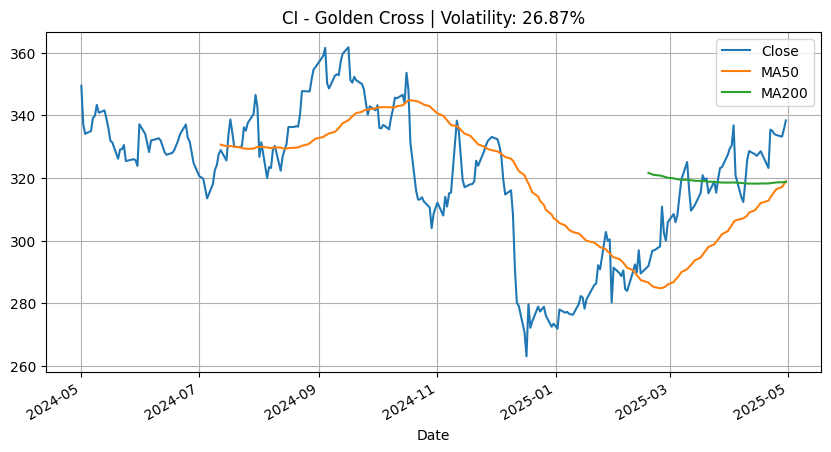

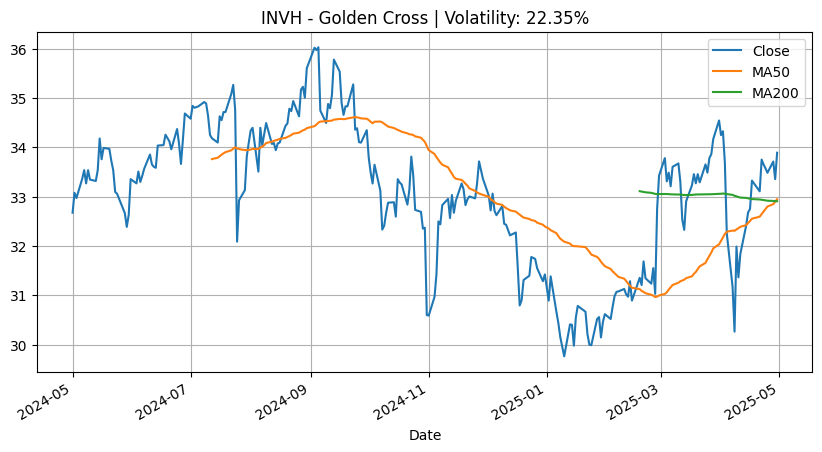

In [ ]:
# CODE HERE
def plot_moving_averages(tickers, title):
    for ticker in tickers[:10]:
        plt.figure(figsize=(10, 5))
        df_close[ticker].plot(label='Close')
        df_ma50[ticker].plot(label='MA50')
        df_ma200[ticker].plot(label='MA200')
        plt.title(f"{ticker} - {title} | Volatility: {volatility[ticker]:.2%}")
        plt.legend()
        plt.grid()
        plt.show()

# Visualize the results here

top_golden = sorted(golden_crosses)[:10]
plot_moving_averages(top_golden, 'Golden Cross')

####4.4 Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

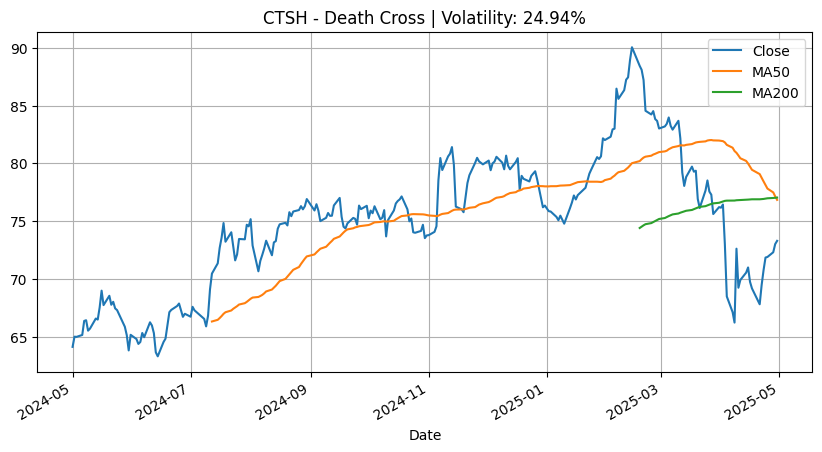

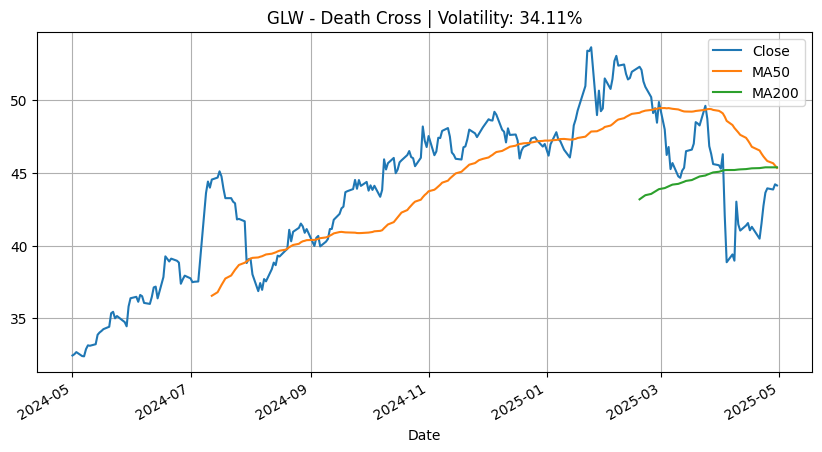

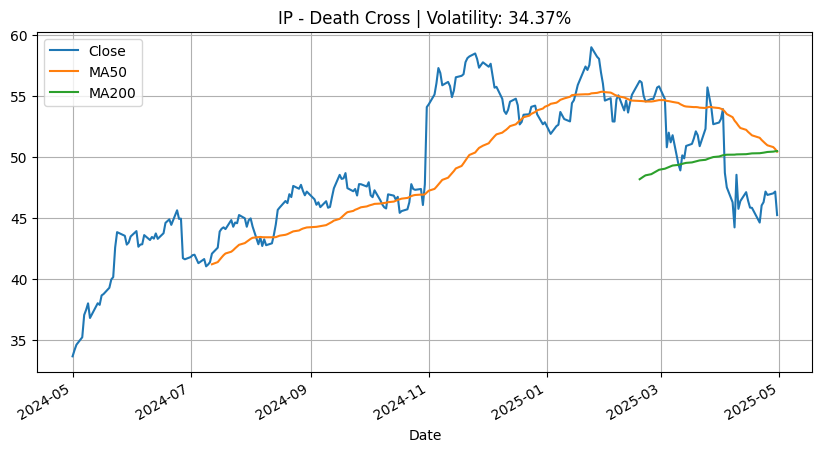

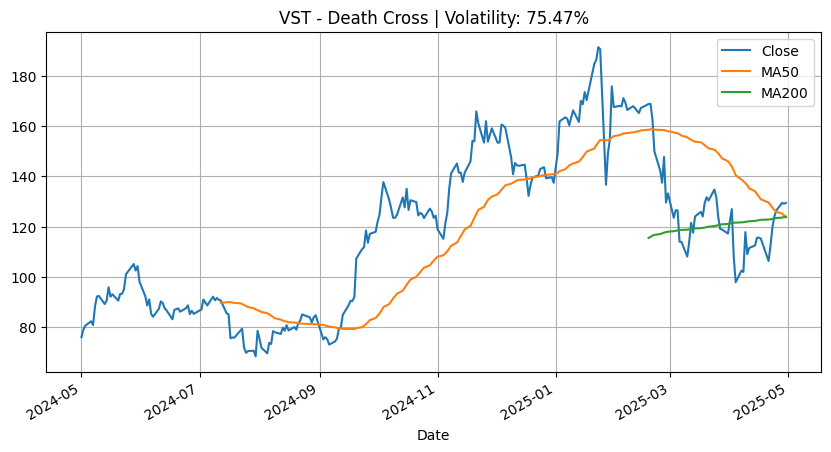

In [ ]:
top_death = sorted(death_crosses)[:10]
plot_moving_averages(top_death, 'Death Cross')

# Visualize the results here

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross occurs when a short-term moving average  crosses above a long-term moving average. "It signals a potential start of a bullish trend" "to buy".



#### What is a Death Cross and how might market participants react to it?

A Death Cross occurs when the short-term moving average crosses below the long-term moving average."It indicates a potential bearish trend", "to sell".


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Crossovers between these averages highlight significant trend changes, also helos to identify trends.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

A 14-day window is short enough to capture recent signals, but also is not too sensitive to daily noise.



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility measures price variability, so:
- A Golden or Death Cross with low volatility is  more reliable.
- High volatility may lead to many false signals.


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

Backtest a strategy that buys after a Golden Cross and sells after a Death Cross. Also you could test how often these signals works well
in the historical data.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Ignores news, earnings, and other fundamental drivers of stock prices. But more important, is more vulnerable to market manipulation.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

Combine the Golden Cross with additional indicators (volume confirmation, RSI, MACD), or with a confirmation.

Note for the teacher: years ago, when I was on my first year of college, I was into Trading, I tried a lot of platforms and also tried to use my actuarial and math skills. Also, I learned that is more important to be ready for big news, beacuse all of this are Independent random events.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, sentiment analysis can confirm whether a technical crossover is supported by positive or negative market sentiment. 

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

Not at all, is a lagging indicator and should be combined with fundamental analysis, sentiment analysis, and risk management.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

No, volatility shows that after a Golden or Death Cross, corrections can occur.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

- Golden and Death Crosses are useful tools for identifying long-term trends.
- They can work the other way around, after a big piece of news that shakes the market, it can tell us when the shock ended.
Caveats in 2 or 3 bullet points:

- They are lagging indicators and do not capture early trend reversals.
- High volatility can generate many false signals.
- They rely solely on price action, ignoring fundamental and broader market information.